# Example ETL
This file is an example ETL (Extract, Transform, Load) task. 

In [1]:
import datetime
start_date = datetime.datetime(2020, 2, 16, 0, 0)
end_date = datetime.datetime(2020, 2, 20, 0, 0)
categories = ['A', 'B', 'D']

# Imports and Settings

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Set matplotlib back-end
%matplotlib inline

## Functions used for the ETL

In [4]:
def extract_data():
    # Imagine this being data extraction
    dt_range = pd.date_range("2020-02-01", periods=50, freq="D")
    return pd.DataFrame({
            "date": np.random.choice(dt_range, 700),
            "category": np.random.choice(list("ABCDE"), 700),
            "value": np.random.random(700),
        }
    )

def transform_data(df):
    return df.pivot_table(
        columns="category",
        index="date",
        values="value",
        aggfunc="sum"
    )

def load_data(df):
    # Pretending to load data to some place
    pass
    

# Job

## Extract

In [5]:
df = extract_data()
df.head()

,date,category,value
0,2020-02-02,B,0.887855
1,2020-02-18,E,0.090392
2,2020-02-25,B,0.208075
3,2020-02-12,D,0.878416
4,2020-02-19,B,0.724702


# Transform

In [6]:
df_transformed = transform_data(df)
df_transformed.head()

category,A,B,C,D,E
date,,,,,
2020-02-01,0.021274,1.707622,0.921471,1.026804,0.870494
2020-02-02,1.028284,1.666561,0.405298,0.963072,1.642677
2020-02-03,1.143748,0.038153,0.710983,2.887063,1.693331
2020-02-04,1.761424,NaN,0.836983,1.524415,1.245928
2020-02-05,NaN,0.916402,0.813088,0.605706,1.879331


In [7]:
# and we filter using the given parameters
df_final = df_transformed.loc[start_date:end_date, categories]
df_final

category,A,B,D
date,,,
2020-02-16,2.523539,1.032082,1.941238
2020-02-17,2.379575,1.104002,1.610906
2020-02-18,NaN,0.553717,2.474169
2020-02-19,1.546838,5.352832,0.362284
2020-02-20,1.940993,0.814750,1.172151


## Load data

In [8]:
load_data(df_final)

## Job summary
Now as the actual ETL is finished we can create a report to inform the maintainer about the batch.


In [9]:
# This cell produces a string output that is read by the parent process to do a nice
# html report to send to the job maintainer informing the most relevant stuff about
# the data in this job.

# We have tagged this cell as 'summary'
from IPython.core.display import HTML
HTML(f"""
<h4>Job Summary</h4>
<ul style="list-style-type:square;">
  <li>Time span loaded: {df_final.index.min():%Y-%m-%d} - {df_final.index.max():%Y-%m-%d}</li>
  <li>Categories: {', '.join(categories)}</li>
  <li>Size (rows): {df_final.shape[0]}</li>
  <li>Mean: {df_final.mean().mean():.2f}</li>
</ul>
""")

## Visualizing the data 
Then we leave some plots to show how this job's data look in detail in case of later debugging. These can be more experimential as if the job crashes here, it's not that big of a deal.

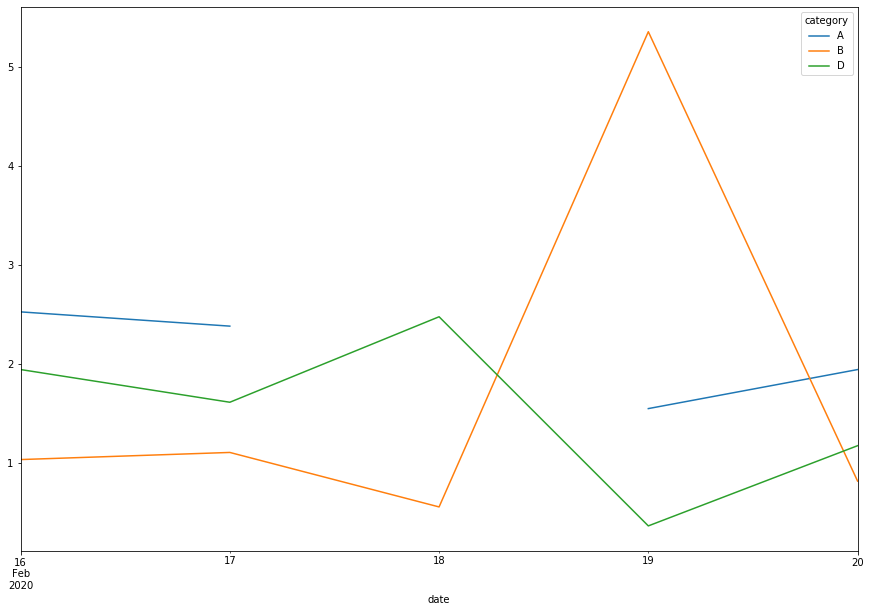

In [10]:
df_final.plot(figsize=(15, 10))

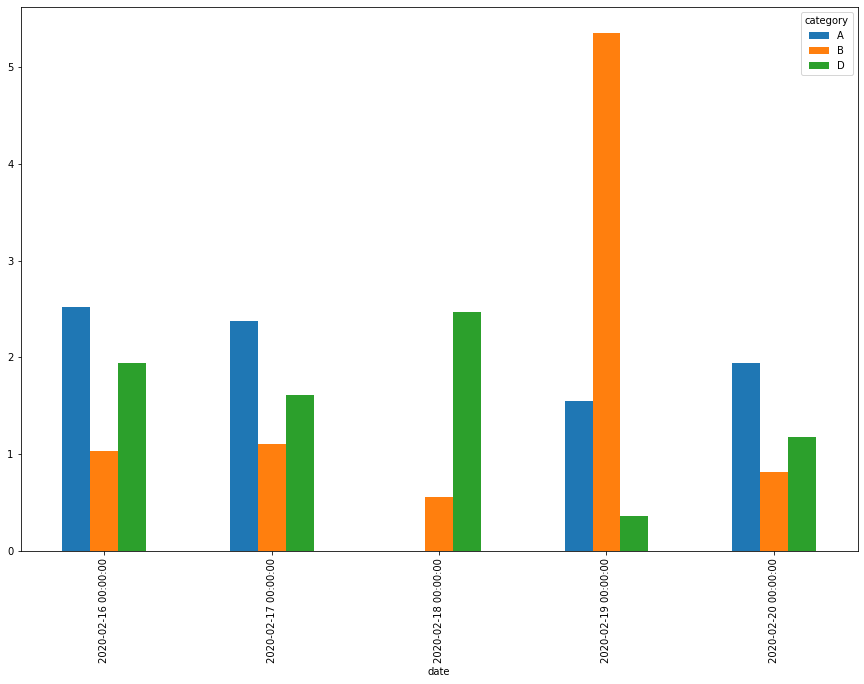

In [11]:
df_final.plot(kind="bar", figsize=(15, 10))